# Rule 110 Cellular Automation

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def ca110(seed,gen=10):
    grid = np.ones(shape=(gen,len(seed)))
    grid[0] = seed
    for row_num in range(1,gen):
        new_row = np.ones(shape = len(seed))
        for i in range(0,len(seed)):
            current = [grid[row_num-1][i-1],grid[row_num-1][i],grid[row_num-1][(i+1)%len(seed)]]
            if current == [1,1,1]:
                new_row[i] = 0
            elif current == [1,1,0]:
                     new_row[i] = 1
            elif current == [1,0,1]:
                     new_row[i] = 1
            elif current == [1,0,0]:
                     new_row[i] = 0
            elif current == [0,1,1]:
                     new_row[i] = 1
            elif current == [0,1,0]:
                     new_row[i] = 1
            elif current == [0,0,1]:
                     new_row[i] = 1
            elif current == [0,0,0]:
                     new_row[i] = 0
        grid[row_num] = new_row
    return grid
            

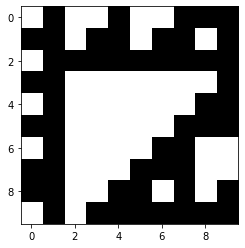

In [2]:
ini_string = np.array([0,1,0,0,1,0,0,1,1,1])
implement = ca110(ini_string)
plt.imshow(implement,cmap= 'Greys')

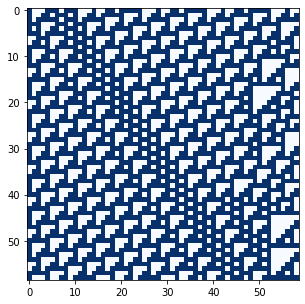

In [3]:
ini_string2 = [1,0,0,0,1,1,1,0,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,0]
check = ca110(ini_string2,len(ini_string2))
#plt.imshow(check, cmap = 'Blues')

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(check, cmap = 'Blues')

# Why are they called rules?
Rules are just mappings from 3 bits to 1 bit. For 3 bits, we can specify 8 different configurations (e.g. 000,001, ... , 111). Each configuration maps to 1 bit, which gives us 8 bits of information (ways to set rules). Hence there are $2^8 = 256$ possible rules. 

# Generalized CA Rule

In [4]:
def ca_rule(dec_num,seed,gen=10):
    if type(dec_num)!= int:
        raise Exception("First positional argument must be an integer!")
    if dec_num < 0 or dec_num > 255:
        raise Exception("First positional argument must be in [0,255]!")
    #convert to binary
    bin_num = np.binary_repr(dec_num)
    #zero padding
    for i in range(len(bin_num),8):
        bin_num = "0" + bin_num
    
    grid = np.ones(shape=(gen,len(seed)))
    grid[0] = seed
    for row_num in range(1,gen):
        new_row = np.ones(shape = len(seed))
        for i in range(0,len(seed)):
            current = [grid[row_num-1][i-1],grid[row_num-1][i],grid[row_num-1][(i+1)%len(seed)]]
            if current == [1,1,1]:
                new_row[i] = bin_num[0]
            elif current == [1,1,0]:
                     new_row[i] = bin_num[1]
            elif current == [1,0,1]:
                     new_row[i] = bin_num[2]
            elif current == [1,0,0]:
                     new_row[i] = bin_num[3]
            elif current == [0,1,1]:
                     new_row[i] = bin_num[4]
            elif current == [0,1,0]:
                     new_row[i] = bin_num[5]
            elif current == [0,0,1]:
                     new_row[i] = bin_num[6]
            elif current == [0,0,0]:
                     new_row[i] = bin_num[7]
        grid[row_num] = new_row
    return grid

Text(0.5, 1.0, 'Rule 110')

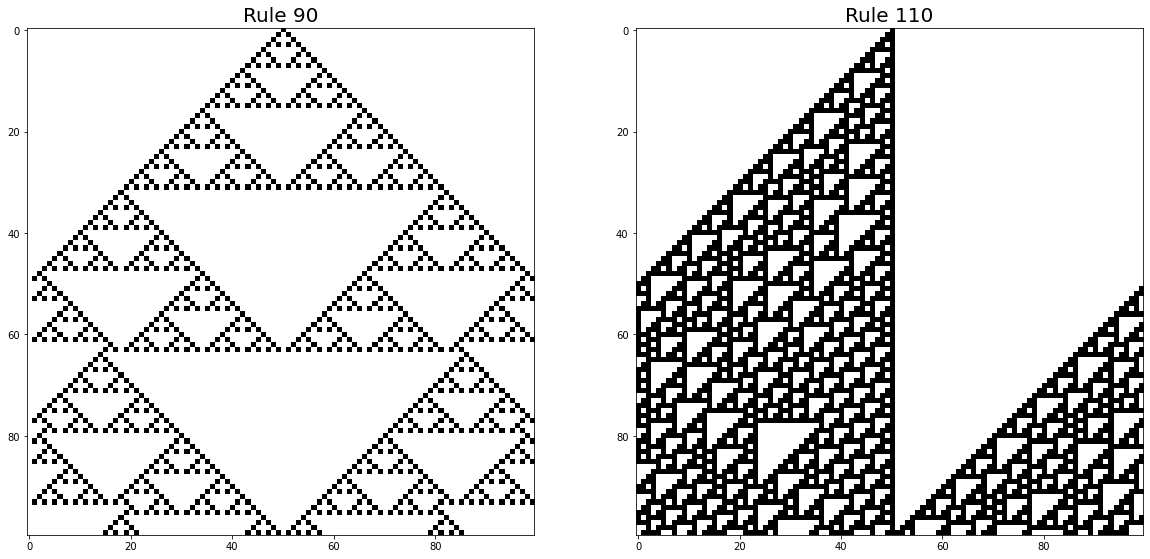

In [5]:
length = 100
initial_cond = [1 if i==int(length/2) else 0 for i in range(length)]
r90_val = ca_rule(90,initial_cond,length)
r110_val = ca_rule(110,initial_cond,length)


fig, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].imshow(r90_val, cmap = 'Greys')
ax[0].set_title('Rule 90', fontsize = 20)
ax[1].imshow(r110_val, cmap = 'Greys')
ax[1].set_title('Rule 110', fontsize = 20)

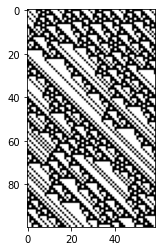

In [6]:
check = ca_rule(120,ini_string2,100)
plt.imshow(check,cmap='Greys')

# Schelling's Model of racial segregation

In [7]:
"""
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')
"""

"\nfrom os.path import basename, exists\n\ndef download(url):\n    filename = basename(url)\n    if not exists(filename):\n        from urllib.request import urlretrieve\n        local, _ = urlretrieve(url, filename)\n        print('Downloaded ' + local)\n    \ndownload('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')\ndownload('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/Cell2D.py')\n"

#### Mini tutorial for boolean indexing

In [8]:
ser1 = np.array([1,2,3,4,5,6])

print("Orignal Series")
print(ser1)
print("Example 1: Greater than 2")
print(ser1[ser1 > 2])
print("Example 2: Greater then 5 and less than 2")
print(ser1[(ser1 < 5) & (ser1 > 2)])
print("Example 3: Not less than 4")
print(ser1[~(ser1 < 4)])

#editing values:
print("Example 4: Set all values greater than 2 to 0")
ser1[ser1 > 2] = 5
print(ser1)

Orignal Series
[1 2 3 4 5 6]
Example 1: Greater than 2
[3 4 5 6]
Example 2: Greater then 5 and less than 2
[3 4]
Example 3: Not less than 4
[4 5 6]
Example 4: Set all values greater than 2 to 0
[1 2 5 5 5 5]


In [9]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# make a custom color map
palette = sns.color_palette('muted')
colors = 'white', palette[1], palette[0]
colors2 = palette[1], 'white', palette[0]

In [10]:
import numpy as np
from scipy.signal import correlate2d

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


from scipy.signal import correlate2d
from time import sleep
from IPython.display import clear_output


class agent_Schelling():
    
    """Creates a grid of Schelling agents"""
    options = dict(mode='same', boundary='wrap')
    #moore neighborhood; we use this for the count neighbors function
    #instantiated as a class variable so that we can easily change neighborhood for an instance of agent_Schelling()
    #vonNeumann at the moment for quiz
    kernel = np.array([[0, 1, 0],
                       [1, 0, 1],
                       [0, 1, 0]], dtype=np.int8)
    
    def __init__(self, p_happy, n, m=None, ):
        """ Initialize instance variables
        n: number of rows
        m: number of columns
        p_happy: happiness threshold on the fraction of similar neighbors
        """
        self.p_happy = p_happy
        m = n if m is None else m
        #set possible choices; dtype to ensure boolean masking is easy; 
        #-1 is red, 0 is empty, 1 is blue
        choices = np.array([-1,0,1], dtype = np.int8)
        probs = [0.45,0.1,0.45]
        self.array = np.random.choice(choices, (n,m), p = probs)

    def count_neighbors(self):    
        #boolean masking
        #generates 2D array of boolean values for red, empty, and blue neighbors
        red_bool = self.array == (-1)
        empty_bool = self.array == 0
        blue_bool = self.array == 1
        
        #counts number of red and blue neighbors; moore neighborhood
        num_red = correlate2d(red_bool, self.kernel, **self.options)
        num_blue = correlate2d(blue_bool, self.kernel, **self.options)
        
        #computes fraction of red and blue neighbors; boolean indexing to set elements with zero neighbors to zero:
        num_neighbors = num_red + num_blue
        frac_red = num_red / num_neighbors
        frac_blue = num_blue / num_neighbors
        frac_red[num_neighbors == 0] = 0
        frac_blue[num_neighbors == 0] = 0
        
        #compute fraction of neighbors with the same color; important to have NaN data type for empty cells to ignore when comparing with p_happy
        frac_same = np.where(red_bool, frac_red, frac_blue)
        frac_same[empty_bool] = np.nan
        
        return empty_bool, frac_same
    
    def segregation(self):
        #useful for testing segregation for a single time step
        _, frac_same = self.count_neighbors()
        return np.nanmean(frac_same)
    
    def locs_where(self, condition):
        #returns list of tuples (i.e., locations)
        return list(zip(*np.nonzero(condition)))
    
    def step(self):
        """Executes one time step.
                
        returns: fraction of similar neighbors, averaged over cells
        """
        empty, frac_same = self.count_neighbors()
        
        # find the unhappy cells (ignore NaN in frac_same)
        with np.errstate(invalid='ignore'):
            unhappy = frac_same < self.p_happy
        unhappy_locs = self.locs_where(unhappy)
        
        # find the empty cells
        empty_locs = self.locs_where(empty)

        # shuffle the unhappy cells
        if len(unhappy_locs):
            np.random.shuffle(unhappy_locs)
            
        # for each unhappy cell, choose a random destination
        num_empty = np.sum(empty)
        
        for source in unhappy_locs:
            i = np.random.randint(num_empty)
            dest = empty_locs[i]
            
            # move
            self.array[dest] = self.array[source]
            self.array[source] = 0
            empty_locs[i] = source
        
            # check that the number of empty cells is unchanged; why would it ever not be?
            num_empty2 = np.sum(self.array==0)
            assert num_empty == num_empty2
        
        # return the average fraction of similar neighbors
        return np.nanmean(frac_same)
    
    def animate(self, frames, interval=None, step=None):
        """Animate the automaton.
        
        frames: number of frames to draw
        interval: time between frames in seconds
        iters: number of steps between frames
        """
        if step is None:
            step = self.step
            
        plt.figure()
        try:
            for i in range(frames-1):
                self.draw()
                #print(self.segregation())
                plt.show()
                if interval:
                    sleep(interval)
                step()
                clear_output(wait=True)
            self.draw()
            plt.show()
        except KeyboardInterrupt:
            pass

    def draw(self):
        """Draws the cells."""
        n, m = self.array.shape
        
        palette = sns.color_palette('muted')
        colors = palette[1], 'white', palette[0]
        cmap=LinearSegmentedColormap.from_list('cmap', colors)

        plt.axis([0, m, 0, n])
        plt.xticks([])
        plt.yticks([])
        return plt.imshow(self.array,
                        cmap = cmap, 
                        alpha=0.7,
                        vmin=-1, vmax=1, 
                        interpolation='none', 
                        origin='upper',
                        extent=[0, m, 0, n])

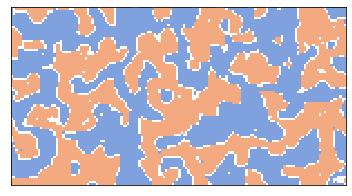

In [85]:
grid = agent_Schelling(0.6,80,150)
grid.animate(frames=50, interval=0.2)

In [86]:
#thresholds
thresholds = np.arange(0,1,0.1).round(1)

#number of steps
num_steps = np.arange(50)
#dimensions
N = 80
M = 150

von_models = [agent_Schelling(p, 80, 150) for p in thresholds]
deg_segs = [[von_models[p_count].step() for i in steps] for p_count in range(len(thresholds))]

<ipython-input-84-9e7861803538>:50: RuntimeWarning: invalid value encountered in divide
  frac_red = num_red / num_neighbors
<ipython-input-84-9e7861803538>:51: RuntimeWarning: invalid value encountered in divide
  frac_blue = num_blue / num_neighbors


Text(0, 0.5, 'Degree of Segregation')

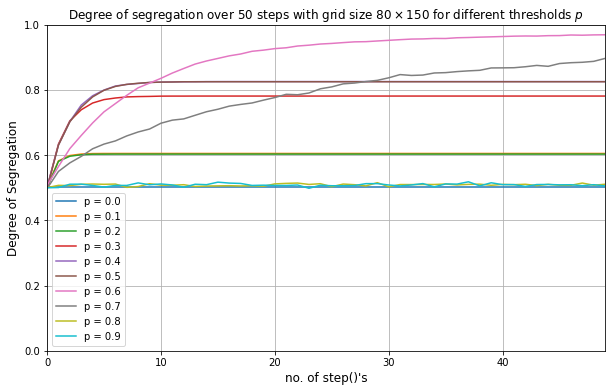

In [92]:
fig, ax = plt.subplots(figsize = (10,6))

for p_count in range(len(thresholds)):
    ax.plot(steps,deg_segs[p_count], label= 'p = ' + str(thresholds[p_count]))
ax.legend()
ax.set_ylim(0,1)
ax.set_xlim(steps.min(),steps.max())
ax.grid()
ax.set_title(r'Degree of segregation over 50 steps with grid size $80 \times 150$ for different thresholds $p$', fontsize = 12)
ax.set_xlabel('no. of step()\'s', fontsize = 12)
ax.set_ylabel('Degree of Segregation', fontsize = 12)

Text(0, 0.5, 'Degree of Segregation')

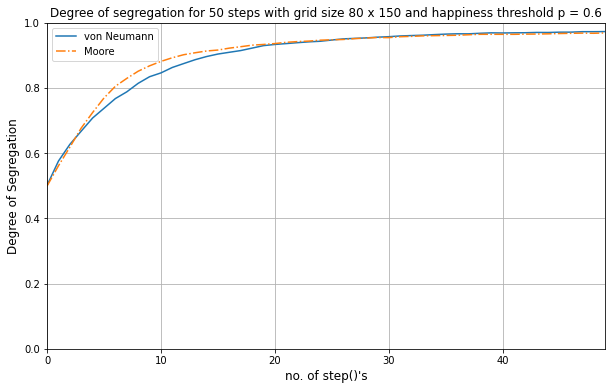

In [76]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(steps,deg_seg, label = 'von Neumann')
ax.plot(steps,deg_seg2, label = 'Moore', ls='-.')
ax.legend()
ax.set_ylim(0,1)
ax.set_xlim(steps.min(),steps.max())
ax.grid()
ax.set_title("Degree of segregation for 50 steps with grid size 80 x 150 and happiness threshold p = 0.6", fontsize = 12)
ax.set_xlabel('no. of step()\'s', fontsize = 12)
ax.set_ylabel('Degree of Segregation', fontsize = 12)